<a href="https://colab.research.google.com/github/rafi456131/DS-2500/blob/main/MA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 2500 – MA-01: Exploratory Data Analysis

Name: Rafiul Asif
uID: u1313264

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd

# 1. Question:
Are there any correlation between driving behaviors, and safety measures, with insurance costs and losses per insured drivers accross the states?

**Explanation:** It aligns with the dataset because the dataset contains the correlation between driver conduct, safety measures, and the ensuing economic ramifications reflected through insurance metrics. And identifying the correlations could help improve the safety measures and implement a cost effective insurance.

# 2. Read in your data



In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/main/Module_Assignment-1/Highway_Safety_Data/bad-drivers.csv")

# 3. Check the packaging

In [4]:
df.shape

(51, 8)

# 4. Look at the top and bottom of data

In [5]:
df.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [6]:
df.tail()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
46,Virginia,12.7,19,27,87,88,768.95,153.72
47,Washington,10.6,42,33,82,86,890.03,111.62
48,West Virginia,23.8,34,28,97,87,992.61,152.56
49,Wisconsin,13.8,36,33,39,84,670.31,106.62
50,Wyoming,17.4,42,32,81,90,791.14,122.04


#Renaming the columns

1. 'ST' - State
2. 'FCPBM' - Number of drivers involved in fatal collisions per billion miles
3. 'FTWWS' - Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
4. 'FCWWAI'- Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
5. 'FCWWND'- Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted
6. 'FCNPA' -Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents
7. 'CIP'   - Car Insurance Premiums ($)
8. 'LIBIC' - Losses incurred by insurance companies for collisions per insured driver

In [7]:
rename_columns = ['ST', 'FTPB', 'FTWWS', 'FCWWAI', 'FCWWND', 'FCNPA', 'CIP', 'LIBIC']
df.columns = rename_columns
df.columns

Index(['ST', 'FTPB', 'FTWWS', 'FCWWAI', 'FCWWND', 'FCNPA', 'CIP', 'LIBIC'], dtype='object')

# 5. Check the "n"s

There should be 50 states and a district(District of Columbia)

In [8]:
len(set(df['ST']))

51

There should be no missing values

In [9]:
df.isnull().sum()

ST        0
FTPB      0
FTWWS     0
FCWWAI    0
FCWWND    0
FCNPA     0
CIP       0
LIBIC     0
dtype: int64

Displays all the data

In [10]:
pd.set_option('display.max_rows', df.shape[0]+1)
df

,ST,FTPB,FTWWS,FCWWAI,FCWWND,FCNPA,CIP,LIBIC
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63
5,Colorado,13.6,37,28,79,95,835.50,139.91
6,Connecticut,10.8,46,36,87,82,1068.73,167.02
7,Delaware,16.2,38,30,87,99,1137.87,151.48
8,District of Columbia,5.9,34,27,100,100,1273.89,136.05
9,Florida,17.9,21,29,92,94,1160.13,144.18


In [11]:
# Setting the default number of rows to 10
pd.set_option('display.max_rows', 10)

Overview of the data types

In [12]:
df.dtypes

ST         object
FTPB      float64
FTWWS       int64
FCWWAI      int64
FCWWND      int64
FCNPA       int64
CIP       float64
LIBIC     float64
dtype: object

Data types in dataframe

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ST      51 non-null     object 
 1   FTPB    51 non-null     float64
 2   FTWWS   51 non-null     int64  
 3   FCWWAI  51 non-null     int64  
 4   FCWWND  51 non-null     int64  
 5   FCNPA   51 non-null     int64  
 6   CIP     51 non-null     float64
 7   LIBIC   51 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 3.3+ KB


Summary Statistics and Correlation matrix

In [14]:
df.describe()
df.corr()

<ipython-input-14-9bc895be9306>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,FTPB,FTWWS,FCWWAI,FCWWND,FCNPA,CIP,LIBIC
FTPB,1.000000,-0.029080,0.199426,0.009782,-0.017942,-0.199702,-0.036011
FTWWS,-0.029080,1.000000,0.286244,0.131738,0.014066,0.042541,-0.061241
FCWWAI,0.199426,0.286244,1.000000,0.043380,-0.245455,-0.017451,-0.083916
FCWWND,0.009782,0.131738,0.043380,1.000000,-0.195265,0.019578,-0.058467
FCNPA,-0.017942,0.014066,-0.245455,-0.195265,1.000000,0.075533,0.042770
CIP,-0.199702,0.042541,-0.017451,0.019578,0.075533,1.000000,0.623116
LIBIC,-0.036011,-0.061241,-0.083916,-0.058467,0.042770,0.623116,1.000000


# 7. Make a plot

Horizontal bar plot for collisions per insured driver accross the states

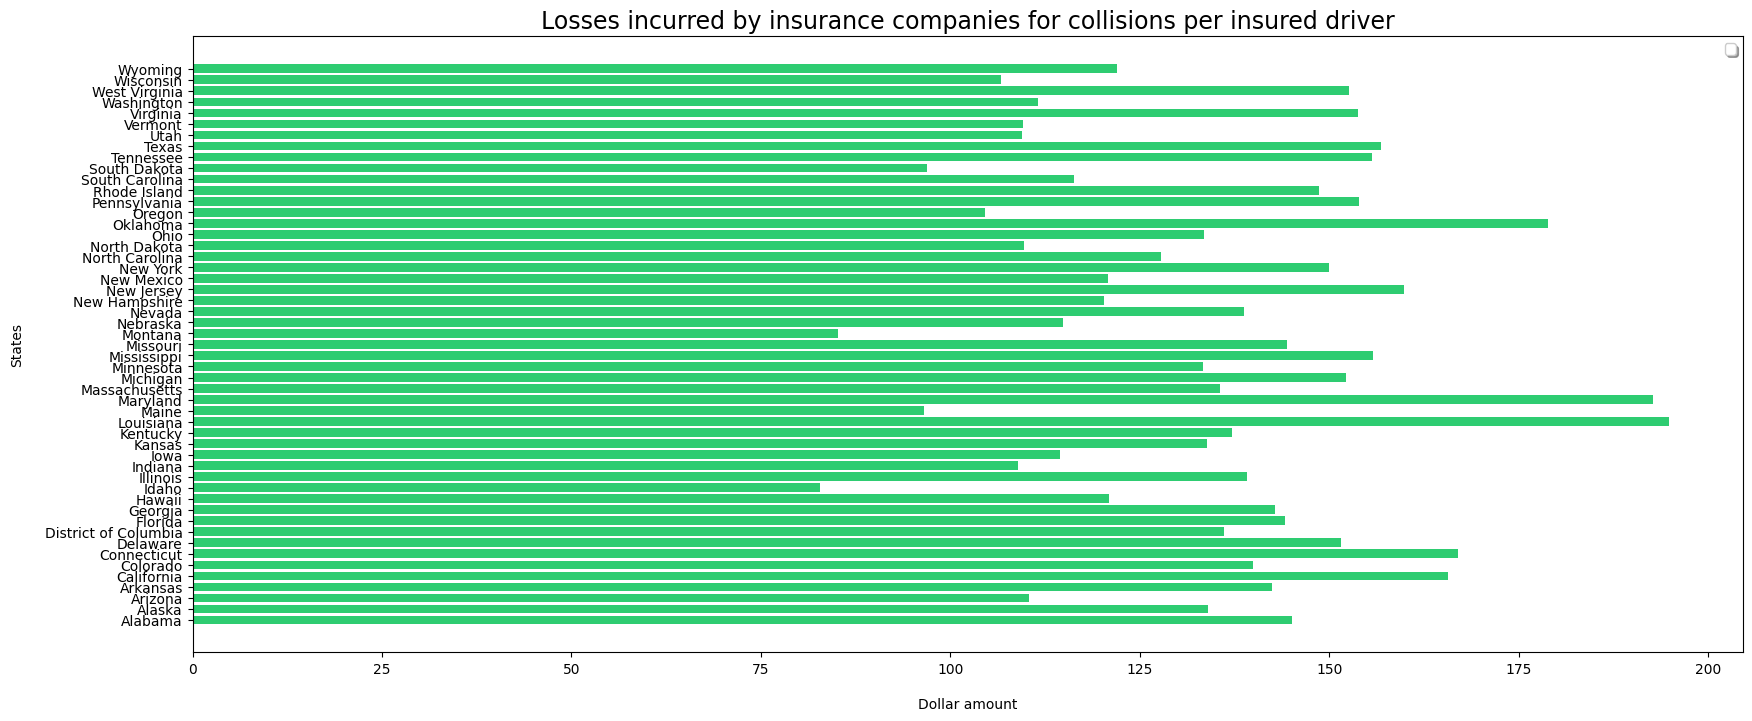

In [15]:
plt.figure(figsize=(20,8))
plt.barh(df.ST, df.LIBIC,color="#2ecc71")
plt.title("Losses incurred by insurance companies for collisions per insured driver", fontsize=17)
plt.ylabel("States", labelpad=15)
plt.xlabel("Dollar amount", labelpad=15)
plt.xlim()
plt.legend(shadow=True, frameon=True, facecolor="white")

Visual pairplot representation of the dataset

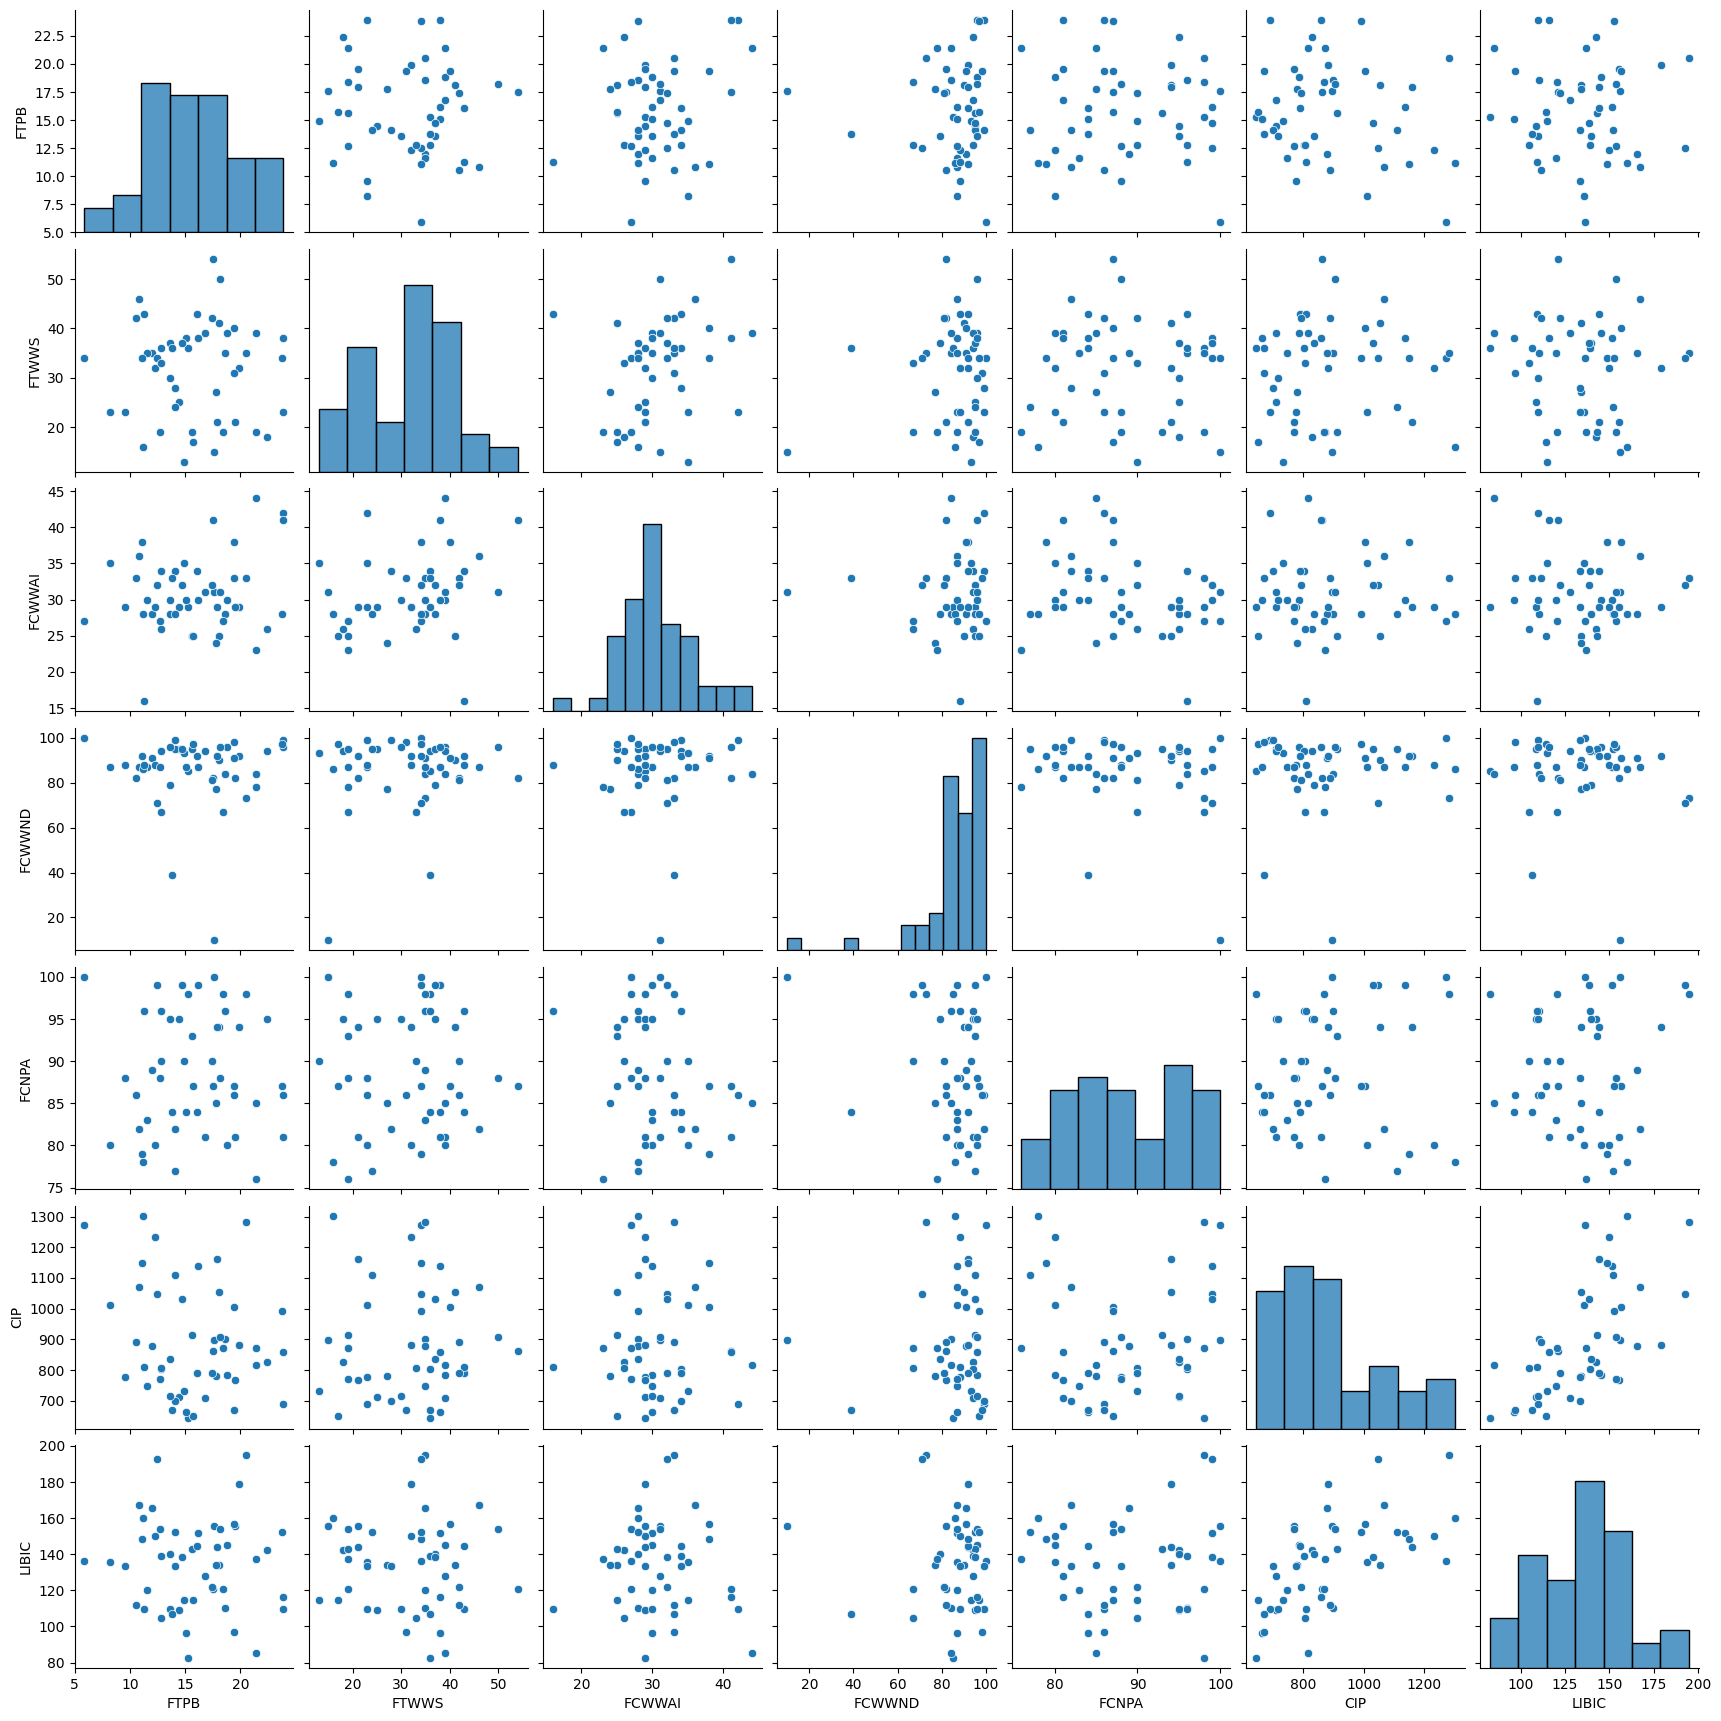

In [16]:
sb.pairplot(df)
plt.show()

a visual summary of the distribution for each data, showing the spread and skewness.

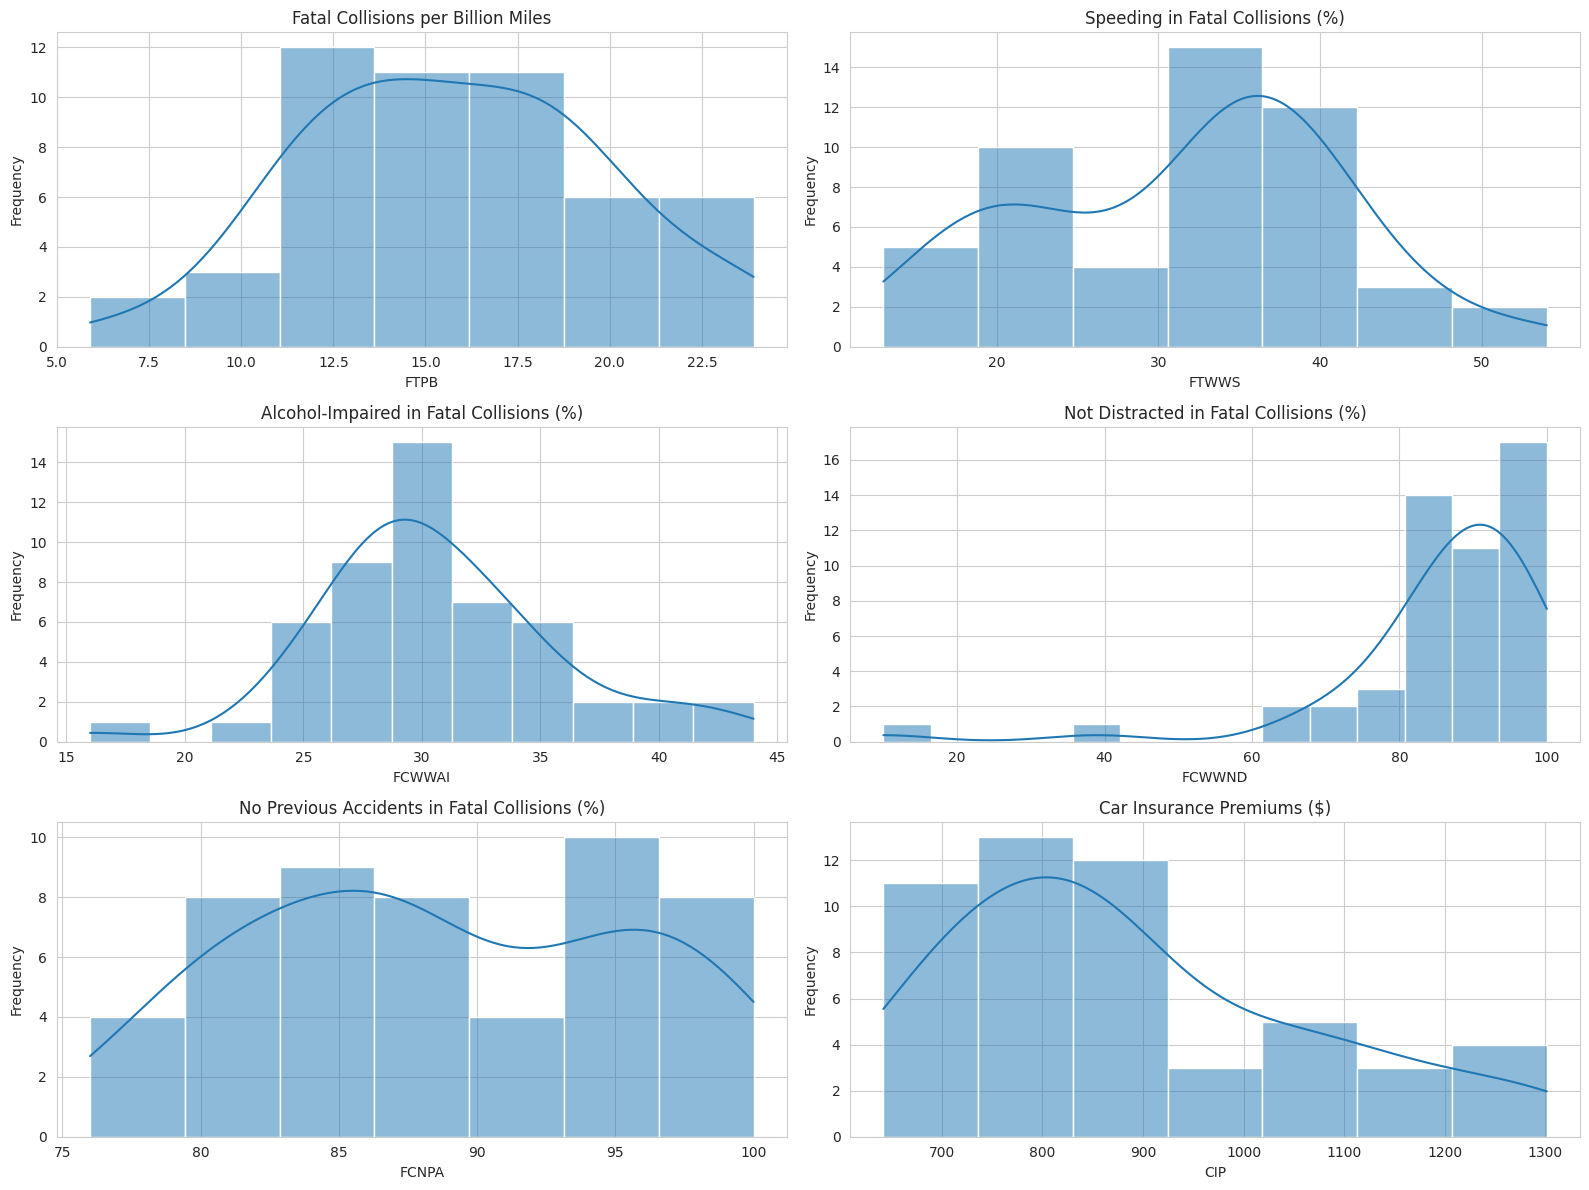

In [17]:

sb.set_style("whitegrid")

fig, ax = plt.subplots(3, 2, figsize=(16, 12))

titles = [
    "Fatal Collisions per Billion Miles",
    "Speeding in Fatal Collisions (%)",
    "Alcohol-Impaired in Fatal Collisions (%)",
    "Not Distracted in Fatal Collisions (%)",
    "No Previous Accidents in Fatal Collisions (%)",
    "Car Insurance Premiums ($)"
]

columns = [
     'FTPB', 'FTWWS', 'FCWWAI', 'FCWWND', 'FCNPA', 'CIP'
]

for i, ax in enumerate(ax.flat):
    sb.histplot(df[columns[i]], kde=True, ax=ax)
    ax.set_title(titles[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()





Correlation heatmap to see relationships between datas

<ipython-input-18-8540ecf4cd8d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


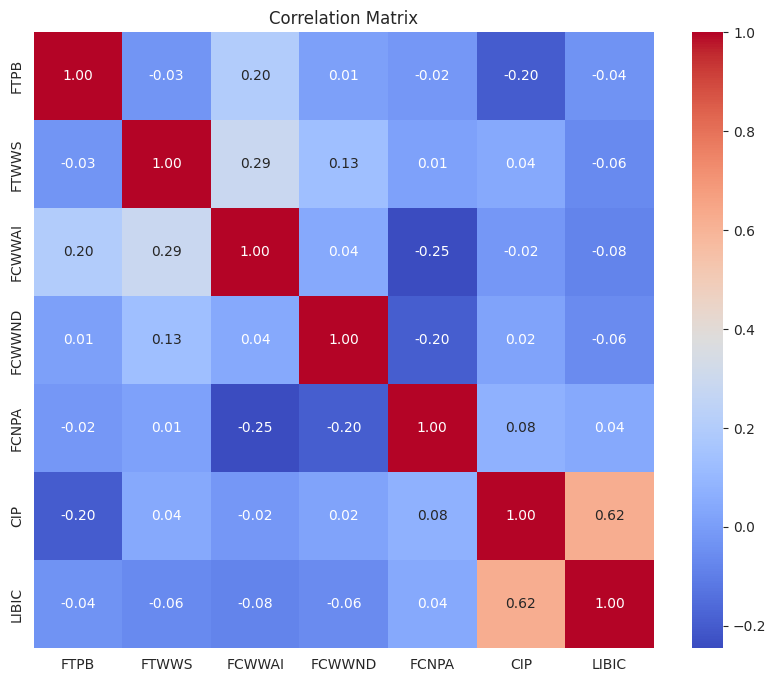

In [18]:
plt.figure(figsize=(10, 8))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Reflection
The above exploratory data analysis provides a comprehensive understanding of the dataset, and highlights the key patterns and relationships between datas.

The average rate of fatal collisions per billion miles is approximately 15.79, with states varying significantly in their rates with a low of 5.9 to a high of 23.9, which clearly indicates a range of road safety conditions across the U.S.
On average, 31.72% of fatal collisions involves speeding, with a broad range of 13% to 54%. Alcohol impairment is also involved in an average of 30.69% of fatal collisions, with a range of 16% to 44%. Percentages are relatively high for fatal collisions of the passengers who had no previous accidents. On average the car insurance premium is approximately $886.96, which indicates a  variability in the insurance costs which potentially reflects the differences in the road safety, vehicle density, and legal requirements across states.
This analysis shows key areas of interest and concern regarding driving behaviors and their impact on road safety and insurance costs. These findings could inform policymakers and road safety advocates about targeting interventions, such as stricter enforcement of speeding and drunk driving laws, or public awareness campaigns about the dangers of risky driving behaviors.

The heatmap shows several interesting relationships between variables. There's a positive correlation between the percentage of drivers involved in fatal collisions who were speeding and those who were alcohol-impaired, which suggests that risky driving behaviors often occurs together. There's also a slight negative correlation between the percentage of drivers not distracted in fatal collisions and car insurance premiums, which might indicate that states with more focused drivers have slightly lower insurance costs.

The correlations observed, particularly those involving risky behaviors and their impact on insurance costs, emphasizes the importance of comprehensive road safety programs.

Through careful analysis, states can better understand the factors contributing to road safety and work towards effective solutions which will reduce fatal collisions and ultimately lower the financial burden of car insurance. ​